In [3]:
import os
print(os.path.expanduser("~"))


C:\Users\ramha


In [19]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# -------- 0) Paths & Setup --------
DOWNLOADS = Path(r"C:\Users\ramha\Downloads")
CSV_PATH = DOWNLOADS / "Customer_Data1.csv"
OUT_DIR = DOWNLOADS / "analysis_results"
OUT_DIR.mkdir(exist_ok=True)

print(f"📁 Reading: {CSV_PATH}")
if not CSV_PATH.exists():
    raise FileNotFoundError(f"CSV not found at: {CSV_PATH}")


📁 Reading: C:\Users\ramha\Downloads\Customer_Data1.csv


In [21]:
# -------- 1) Load Data --------
df = pd.read_csv(CSV_PATH)
print("✅ Data loaded:", df.shape)
print(df.head())

# Clean column names
df.columns = df.columns.str.strip()

# -------- Helper: Safe column check --------
def has_cols(required):
    missing = [c for c in required if c not in df.columns]
    if missing:
        print(f"⚠️ Skipping section: missing columns {missing}")
        return False
    return True


✅ Data loaded: (6418, 32)
  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1 

In [22]:
# -------- 2) Null Value Analysis --------
null_summary = df.isnull().sum().reset_index()
null_summary.columns = ["Column", "Null_Count"]
null_summary["Null_Percentage"] = (null_summary["Null_Count"] / len(df)) * 100

print("\n🧹 Null Count Summary (Top 20):")
print(null_summary.sort_values("Null_Count", ascending=False).head(20))

null_summary.to_csv(OUT_DIR / "null_summary.csv", index=False)



🧹 Null Count Summary (Top 20):
                    Column  Null_Count  Null_Percentage
30          Churn_Category        4686        73.013400
31            Churn_Reason        4686        73.013400
7               Value_Deal        3548        55.282019
13           Online_Backup        1390        21.657837
12         Online_Security        1390        21.657837
11           Internet_Type        1390        21.657837
14  Device_Protection_Plan        1390        21.657837
15         Premium_Support        1390        21.657837
17        Streaming_Movies        1390        21.657837
16            Streaming_TV        1390        21.657837
19          Unlimited_Data        1390        21.657837
18         Streaming_Music        1390        21.657837
9           Multiple_Lines         622         9.691493
5      Number_of_Referrals           0         0.000000
6         Tenure_in_Months           0         0.000000
0              Customer_ID           0         0.000000
8            Pho


👫 Gender Distribution:
   Gender  TotalCount  Percentage
0  Female        4048   63.072608
1    Male        2370   36.927392


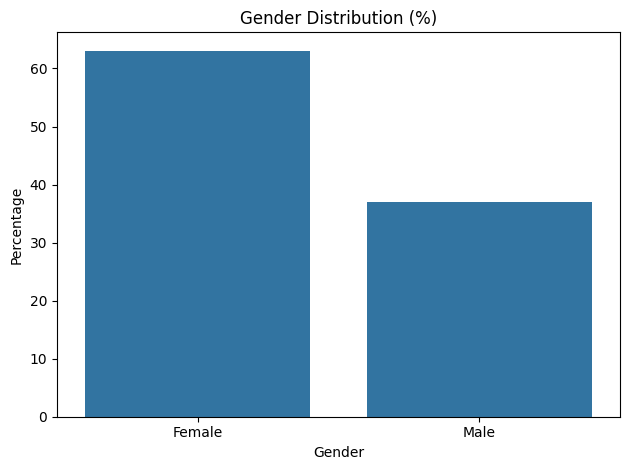

In [23]:
# -------- 3) Gender Distribution --------
if has_cols(["Gender"]):
    gender_summary = (
        df.groupby("Gender")
        .size()
        .reset_index(name="TotalCount")
        .sort_values("TotalCount", ascending=False)
    )
    gender_summary["Percentage"] = (gender_summary["TotalCount"] / len(df)) * 100

    print("\n👫 Gender Distribution:")
    print(gender_summary)

    sns.barplot(data=gender_summary, x="Gender", y="Percentage")
    plt.title("Gender Distribution (%)")
    plt.xlabel("Gender")
    plt.ylabel("Percentage")
    plt.tight_layout()
    plt.show()

    gender_summary.to_csv(OUT_DIR / "gender_summary.csv", index=False)


📄 Contract Type Distribution:
         Contract  TotalCount  Percentage
0  Month-to-Month        3286   51.199751
2        Two Year        1719   26.784045
1        One Year        1413   22.016204


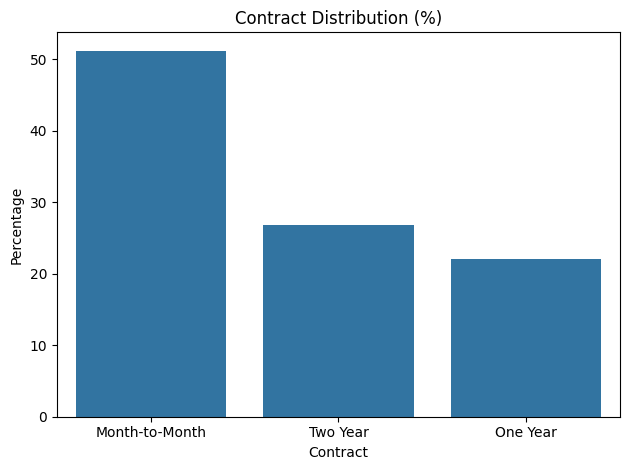

In [24]:
# -------- 4) Contract Type Distribution --------
if has_cols(["Contract"]):
    contract_summary = (
        df.groupby("Contract")
        .size()
        .reset_index(name="TotalCount")
        .sort_values("TotalCount", ascending=False)
    )
    contract_summary["Percentage"] = (contract_summary["TotalCount"] / len(df)) * 100

    print("\n📄 Contract Type Distribution:")
    print(contract_summary)

    sns.barplot(data=contract_summary, x="Contract", y="Percentage")
    plt.title("Contract Distribution (%)")
    plt.xlabel("Contract")
    plt.ylabel("Percentage")
    plt.tight_layout()
    plt.show()

    contract_summary.to_csv(OUT_DIR / "contract_summary.csv", index=False)


💵 Customer Status & Revenue:
  Customer_Status  TotalCount     TotalRev  RevPercentage
2          Stayed        4275  16010148.27      82.223960
0         Churned        1732   3411960.58      17.522943
1          Joined         411     49281.56       0.253097


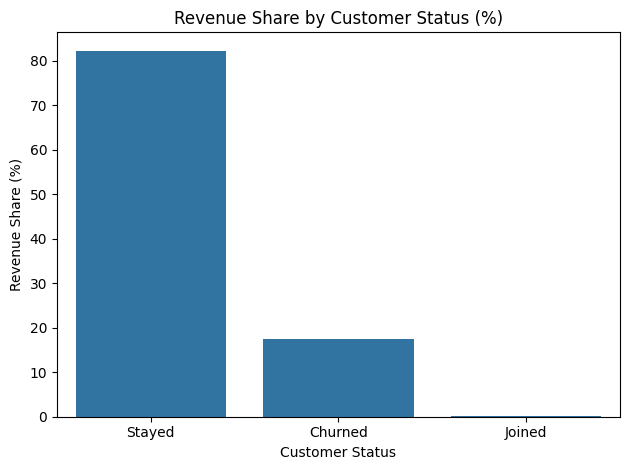

In [26]:
# -------- 5) Customer Status & Total Revenue --------
if has_cols(["Customer_Status", "Total_Revenue"]):
    df["Total_Revenue"] = pd.to_numeric(df["Total_Revenue"], errors="coerce")

    cust_status = (
        df.groupby("Customer_Status", dropna=False)
        .agg(TotalCount=("Customer_Status", "count"),
             TotalRev=("Total_Revenue", "sum"))
        .reset_index()
        .sort_values("TotalRev", ascending=False)
    )

    total_rev_sum = cust_status["TotalRev"].sum()
    cust_status["RevPercentage"] = (
        cust_status["TotalRev"] / total_rev_sum * 100 if total_rev_sum else 0
    )

    print("\n💵 Customer Status & Revenue:")
    print(cust_status)

    sns.barplot(data=cust_status, x="Customer_Status", y="RevPercentage")
    plt.title("Revenue Share by Customer Status (%)")
    plt.xlabel("Customer Status")
    plt.ylabel("Revenue Share (%)")
    plt.tight_layout()
    plt.show()

    cust_status.to_csv(OUT_DIR / "customer_status_summary.csv", index=False)



🌍 State-wise Customer Distribution (Top 10):
             State  TotalCount  Percentage
19   Uttar Pradesh         629    9.800561
17      Tamil Nadu         600    9.348707
12     Maharashtra         504    7.852914
9        Karnataka         470    7.323154
6          Haryana         398    6.201309
0   Andhra Pradesh         395    6.154565
21     West Bengal         368    5.733873
15          Punjab         342    5.328763
2            Bihar         336    5.235276
5          Gujarat         335    5.219695


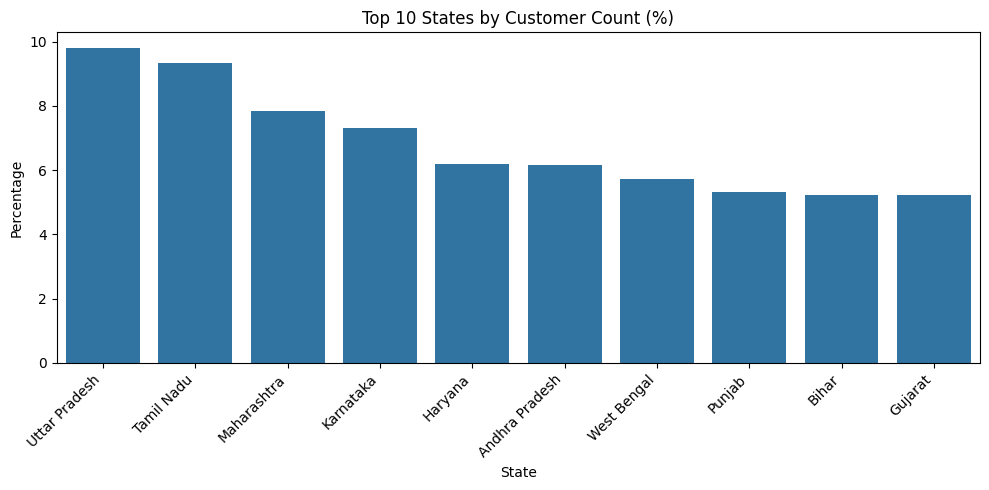

In [27]:
# -------- 6) State-wise Distribution --------
if has_cols(["State"]):
    state_summary = (
        df.groupby("State")
        .size()
        .reset_index(name="TotalCount")
    )
    state_summary["Percentage"] = (state_summary["TotalCount"] / len(df)) * 100
    state_summary = state_summary.sort_values("Percentage", ascending=False)

    print("\n🌍 State-wise Customer Distribution (Top 10):")
    print(state_summary.head(10))

    plt.figure(figsize=(10, 5))
    sns.barplot(data=state_summary.head(10), x="State", y="Percentage")
    plt.title("Top 10 States by Customer Count (%)")
    plt.xlabel("State")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    state_summary.to_csv(OUT_DIR / "state_summary.csv", index=False)

In [28]:
# -------- 7) Distinct Internet Types --------
if has_cols(["Internet_Type"]):
    distinct_internet_types = (
        pd.Series(df["Internet_Type"].dropna().unique())
        .sort_values()
        .reset_index(drop=True)
        .rename("Internet_Type")
    )

    print("\n📡 Distinct Internet Types:")
    print(distinct_internet_types.to_string(index=False))

    distinct_internet_types.to_csv(OUT_DIR / "distinct_internet_types.csv", index=False)



📡 Distinct Internet Types:
      Cable
        DSL
Fiber Optic


In [29]:
# -------- 8) Combine Key Insights --------
summary = {}

if 'gender_summary' in locals():
    summary["Gender"] = gender_summary.to_dict(orient="records")

if 'contract_summary' in locals():
    summary["Contract"] = contract_summary.to_dict(orient="records")

if 'cust_status' in locals():
    summary["Customer_Status"] = cust_status.to_dict(orient="records")

if 'state_summary' in locals():
    summary["State_Top10"] = state_summary.head(10).to_dict(orient="records")

if 'distinct_internet_types' in locals():
    summary["Internet_Types"] = distinct_internet_types.tolist()

pd.Series(summary).to_json(OUT_DIR / "summary.json")

print(f"\n📁 All summaries saved successfully in: {OUT_DIR.resolve()}")


📁 All summaries saved successfully in: C:\Users\ramha\Downloads\analysis_results
